Requirement Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
import requests
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("delhiaqi.csv")

In [3]:
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [4]:
df.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [5]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


In [6]:
df['date'] = pd.to_datetime(df['date'])
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
 1   co      561 non-null    float64       
 2   no      561 non-null    float64       
 3   no2     561 non-null    float64       
 4   o3      561 non-null    float64       
 5   so2     561 non-null    float64       
 6   pm2_5   561 non-null    float64       
 7   pm10    561 non-null    float64       
 8   nh3     561 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 39.6 KB


Feature Enginneering

In [8]:
# identify duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [date, co, no, no2, o3, so2, pm2_5, pm10, nh3]
Index: []


In [9]:
# count the number of duplicates
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


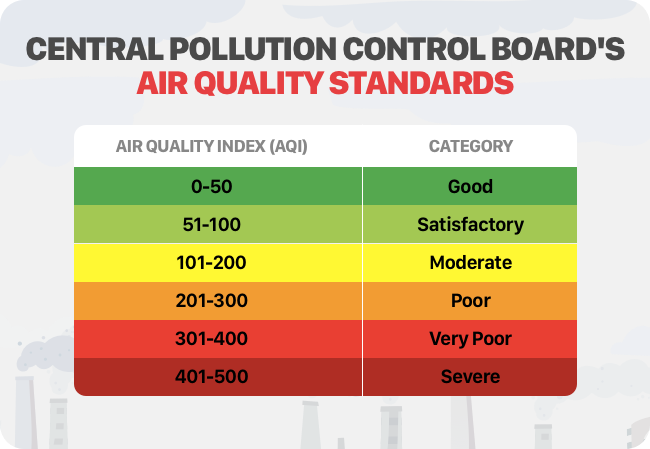

In [11]:
from IPython import display 
display.Image("https://w.ndtvimg.com/sites/3/2019/12/18122812/air_pollution_standards_cpcb.png",width = 400, height = 200)

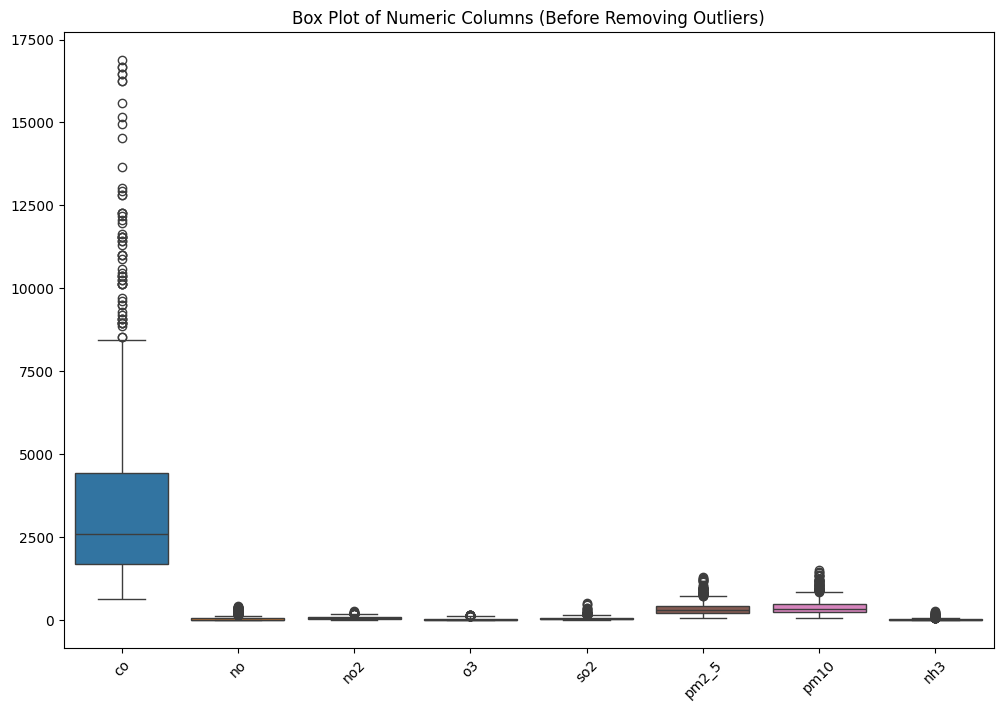

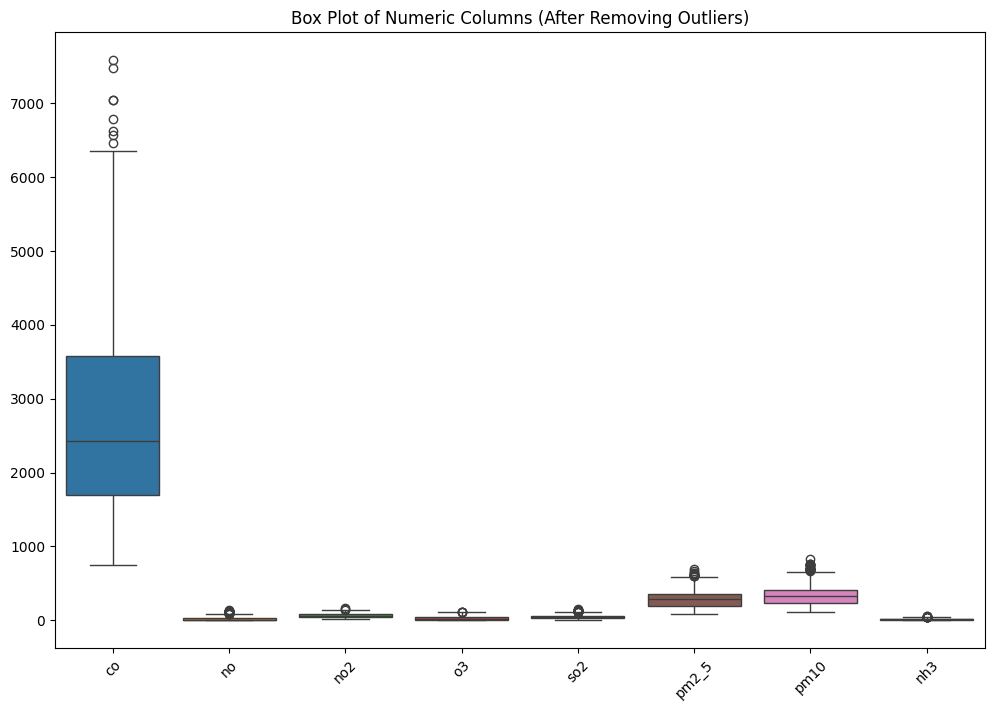

In [12]:
# Select numeric columns for outlier visualization
numeric_columns = ['co','no','no2','o3','so2','pm2_5','pm10','nh3']

# Create a box plot for each numeric column before removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (Before Removing Outliers)')
plt.show()

# Remove outliers from the dataset
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create a box plot for each numeric column after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (After Removing Outliers)')
plt.show()

Exploratory Data Analysis

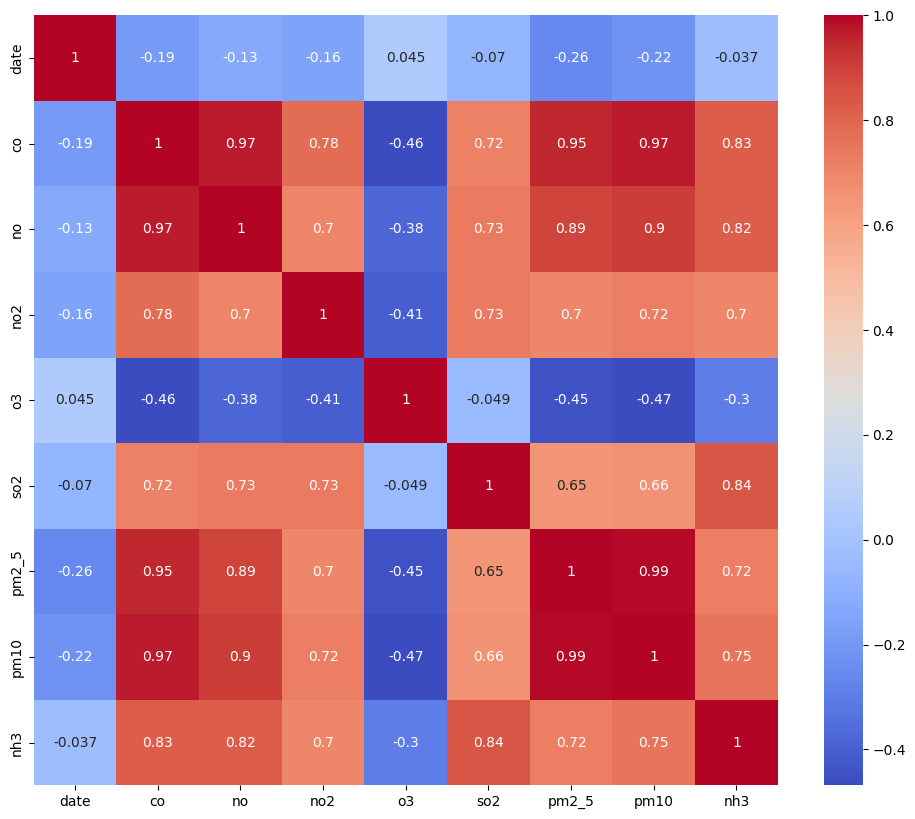

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

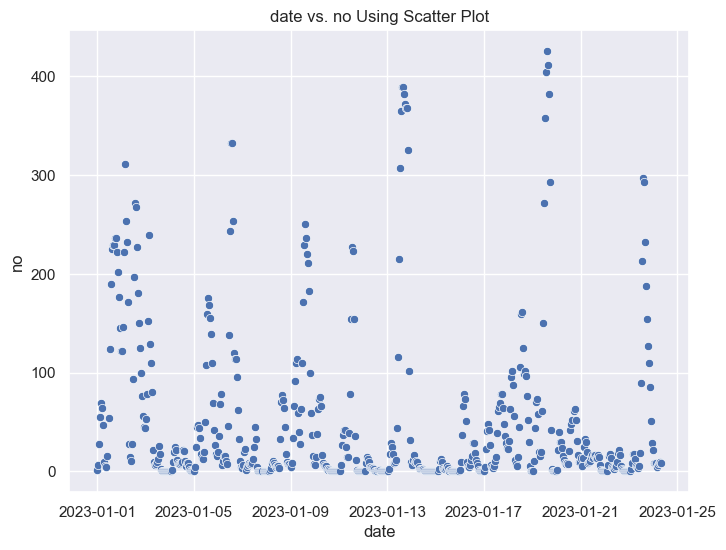

In [14]:
sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='date', y='no', data=df)
plt.title('date vs. no Using Scatter Plot')
plt.show()

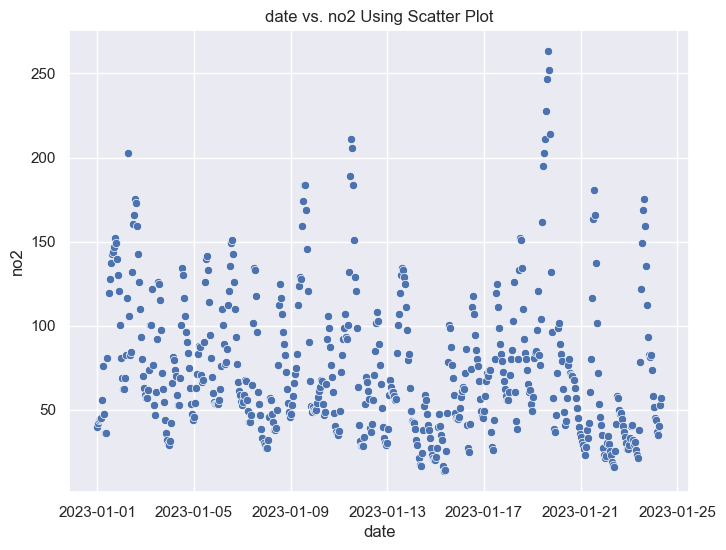

In [15]:
sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='date', y='no2', data=df)
plt.title('date vs. no2 Using Scatter Plot')
plt.show()

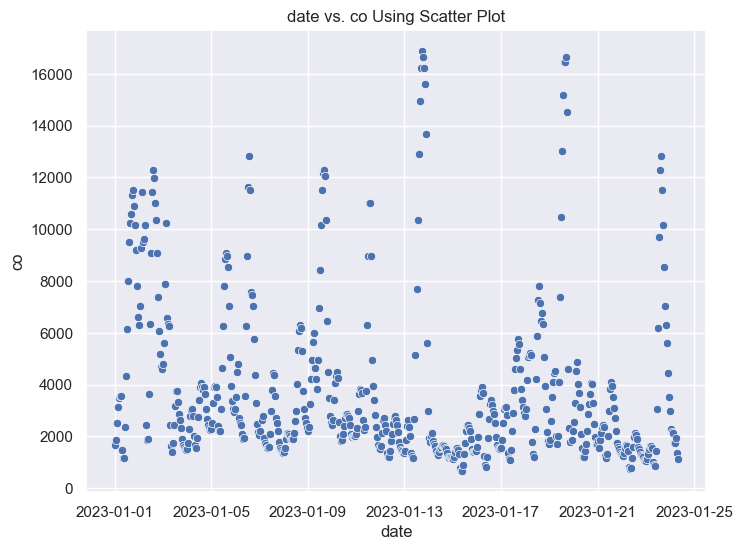

In [16]:
sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='date', y='co', data=df)
plt.title('date vs. co Using Scatter Plot')
plt.show()

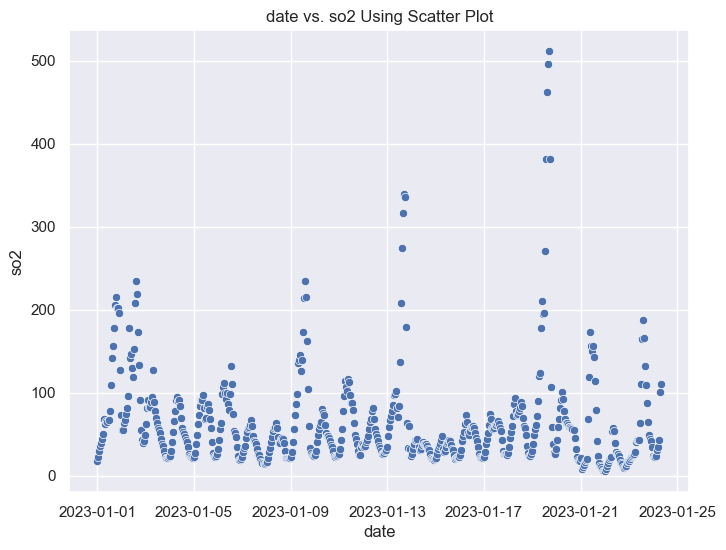

In [17]:
sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='date', y='so2', data=df)
plt.title('date vs. so2 Using Scatter Plot')
plt.show()

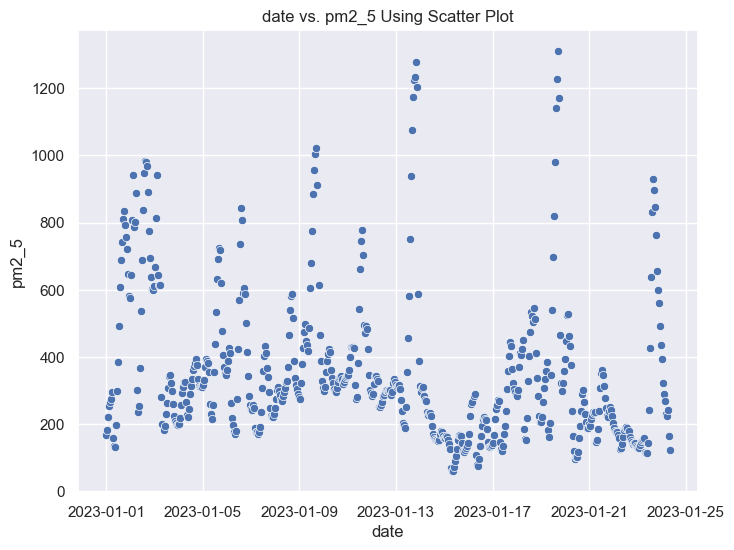

In [18]:
sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='date', y='pm2_5', data=df)
plt.title('date vs. pm2_5 Using Scatter Plot')
plt.show()

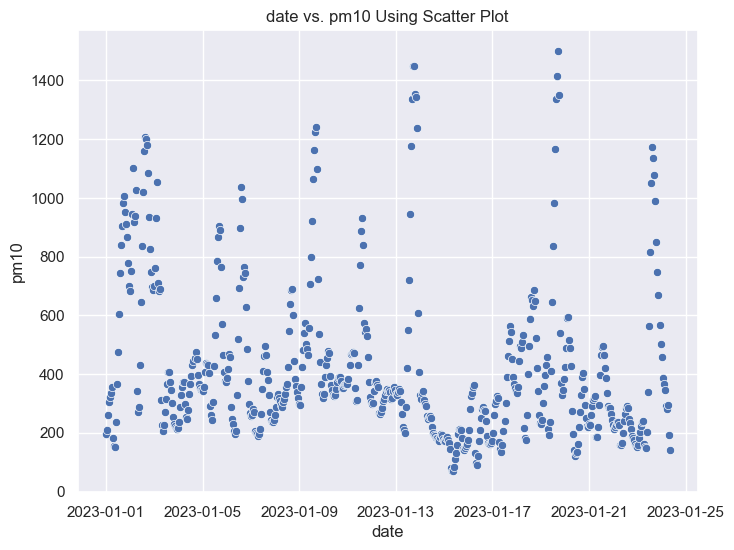

In [19]:
sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='date', y='pm10', data=df)
plt.title('date vs. pm10 Using Scatter Plot')
plt.show()

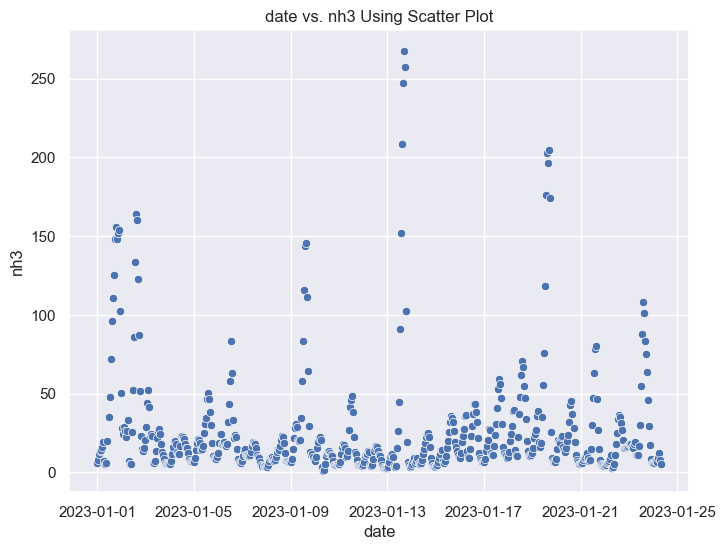

In [20]:
sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='date', y='nh3', data=df)
plt.title('date vs. nh3 Using Scatter Plot')
plt.show()

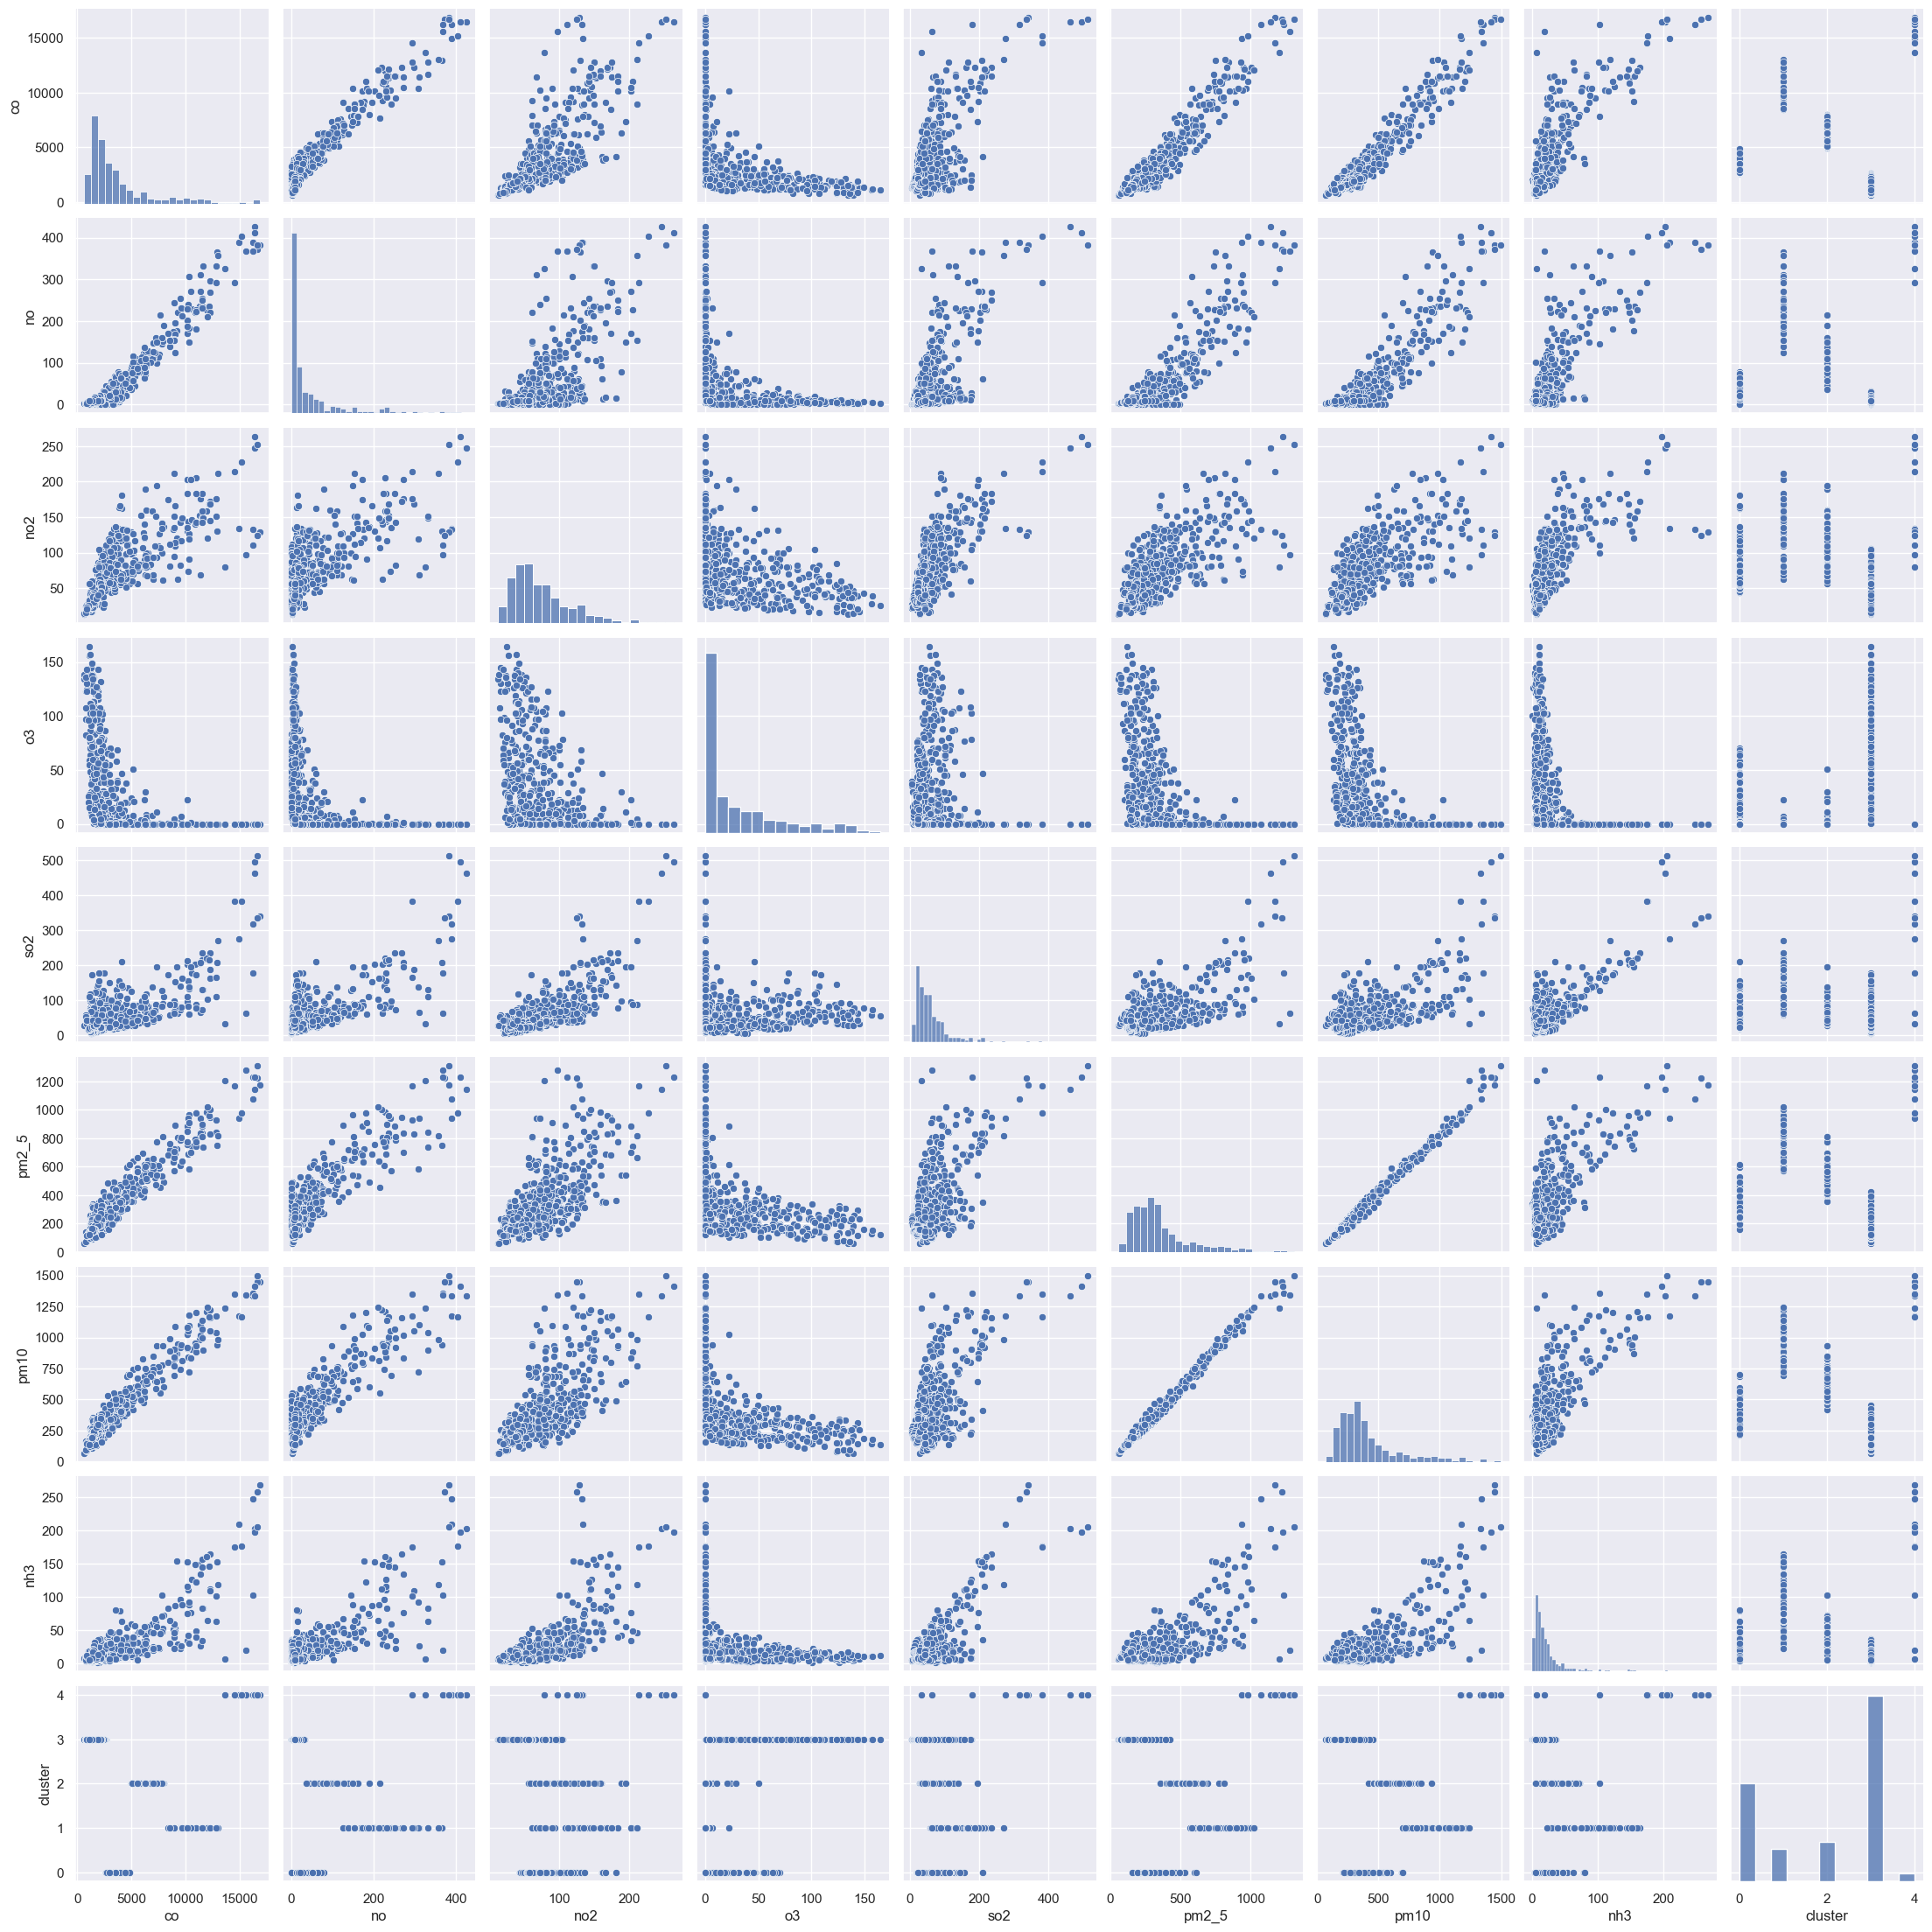

In [41]:
sns.pairplot(df)

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

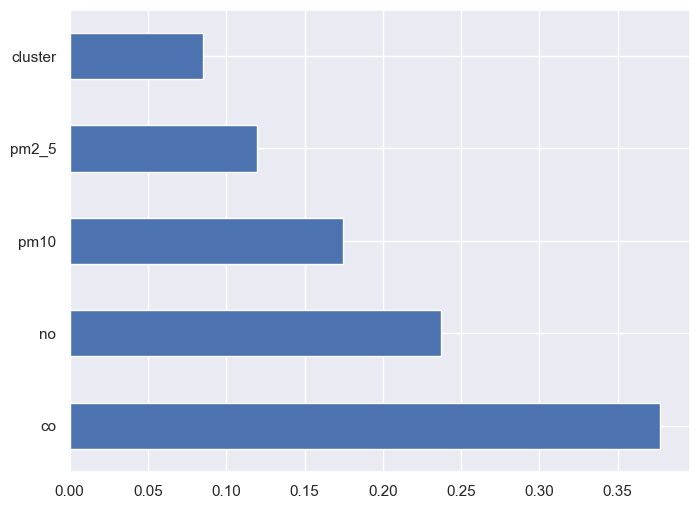

In [43]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

MODEL TRAINING

Train-Test Split:

In [44]:
y = df["date"]
x = df[['no','co','no','no2','o3','so2','pm2_5','pm10','nh3']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(420, 9) (141, 9) (420,) (141,)


Supervised Learning:

In [45]:
# Importing all Models.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

1. Linear Regression:

In [46]:
# Linear Regression Model
mreg = LinearRegression()
mreg.fit(x_train,y_train)
mlr_y_predict = mreg.predict(x_test)

2. Polynomial Regression:

In [47]:
# Polynomial Regression Model:
# Degree = 2

poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)
pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

3. Decision Tree:

In [48]:
# Decision Tree Tegression Model:

dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)
dt_y_predict = dec_tree.predict(x_test)

4. Random Forest:

In [49]:
# Random Forest Regression Model
# Random Forest with 500 trees

rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)
rt_y_predict = rt_reg.predict(x_test)

Model Evaluation: (Supervised Learning)

In [50]:
# Error Estimation Methods

# Test Data prediction

#----- Multiple Linear Regresion -------
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)

#----- Polynomial Regression ------------ 
rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)

#----- Decision Tree Regression ---------
rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)

#----- Random Forest Regression ---------
rmse_rt = sqrt(metrics.mean_squared_error(y_test, rt_y_predict))
mae_rt = metrics.mean_absolute_error(y_test, rt_y_predict)
r2_rt = metrics.r2_score(y_test,rt_y_predict)


# Training Data Prediction

#----- multiple linear regresion -------
mlr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, mreg.predict(x_train)))
mlr_ytp_mae = metrics.mean_absolute_error(y_train, mreg.predict(x_train))
mlr_ytp_r2 = metrics.r2_score(y_train, mreg.predict(x_train))

#------ polynomial regression ---------
pr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, preg.predict(poly_reg.fit_transform(x_train))))
pr_ytp_mae = metrics.mean_absolute_error(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_ytp_r2 = metrics.r2_score(y_train, preg.predict(poly_reg.fit_transform(x_train)))

#----- decision tree regression ---------
dt_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, dec_tree.predict(x_train)))
dt_ytp_mae = metrics.mean_absolute_error(y_train, dec_tree.predict(x_train))
dt_ytp_r2 = metrics.r2_score(y_train, dec_tree.predict(x_train))

# ----- random forest regression -----
rf_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, rt_reg.predict(x_train)))
rf_ytp_mae = metrics.mean_absolute_error(y_train, rt_reg.predict(x_train))
rf_ytp_r2 = metrics.r2_score(y_train, rt_reg.predict(x_train))


# RESULT

print("Evaluating on Training Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Multiple Linear Regresion\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(mlr_ytp_r2,mlr_ytp_rmse,mlr_ytp_mae))
print("Polynomial Regression    \t{0:.2f}\t{1:.2f}\t{2:.3f}".format(pr_ytp_r2,pr_ytp_rmse,pr_ytp_mae))
print("Decision Tree Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(dt_ytp_r2,dt_ytp_rmse,dt_ytp_mae))
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(rf_ytp_r2,rf_ytp_rmse,rf_ytp_mae))
print("\n")
print("Evaluating on Testing Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Multiple Linear Regresion\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_mlr,rmse_mlr,mae_mlr))
print("Polynomial Regression    \t{0:.2f}\t{1:.2f}\t{2:.3f}".format(r2_pr,rmse_pr,mae_pr))
print("Decision Tree Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_dt,rmse_dt,mae_dt))
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_rt,rmse_rt,mae_rt))

Evaluating on Training Data:
Models                   	R^2	RMSE	MAE
Multiple Linear Regresion	0.2752	497951888857424.6250	393322716060787.1875
Polynomial Regression    	0.58	378255998238976.12	291989053747808.938
Decision Tree Regression 	1.0000	0.0000	0.0000
Random Forest Regression 	0.9101	175350603945196.2500	126396891428624.4531


Evaluating on Testing Data:
Models                   	R^2	RMSE	MAE
Multiple Linear Regresion	0.0922	546167113677869.0000	425240631692767.3125
Polynomial Regression    	0.41	440552573396569.50	353962470617545.562
Decision Tree Regression 	-0.1002	601255189211029.8750	386629787234042.5625
Random Forest Regression 	0.4028	442983349921942.1875	327464782978788.7500


Based on the provided evaluation metrics for air quality prediction, the model with the highest R-squared (R^2) score and lowest Root Mean Squared Error (RMSE) on the testing data is often considered the best choice. In this case, the Random Forest Regression model outperforms the other models based on these metrics.

Unsupervised Learning:

In [51]:
# Importing all Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

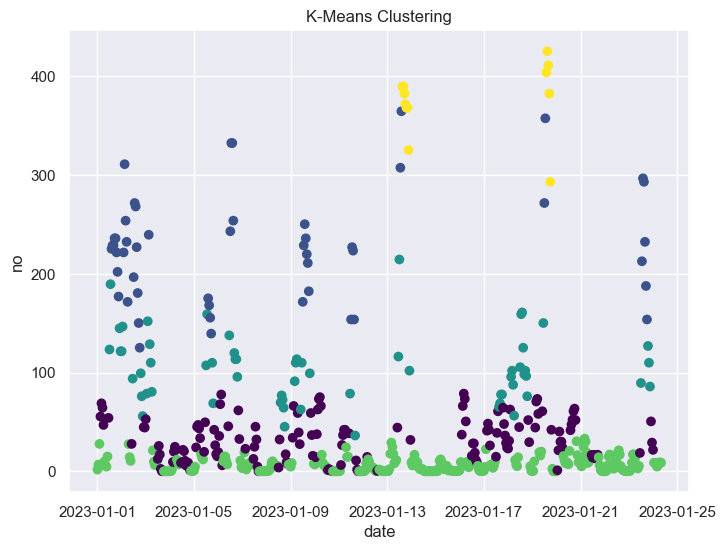

In [52]:
# Drop date columns as they are not used for clustering
X = df.drop(columns=['date'])

# Perform K-Means clustering with k=3 (you can change the number of clusters as needed)
kmeans = KMeans(n_clusters=5,n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (assuming date and no are plotted on a scatter plot)
plt.scatter(df['date'], df['no'], c=df['cluster'], cmap='viridis')
plt.xlabel('date')
plt.ylabel('no')
plt.title('K-Means Clustering')
plt.show()

2. Principal Component Analysis:

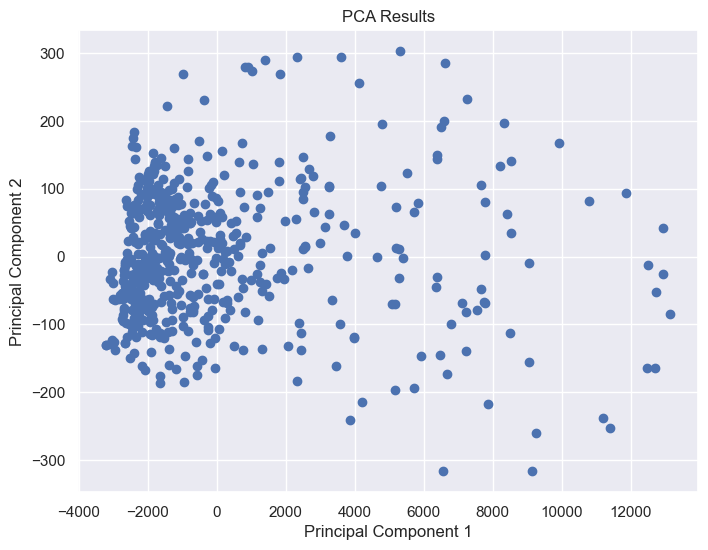

In [53]:
Y = df.drop(columns=['date'])

# Perform PCA with the number of components you desire (let's say 2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Y)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Plot the PCA results (assuming PCA1 and PCA2 are plotted on a scatter plot)
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

Cross Validation and Fine Tuning:

In [54]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
}

# Initialize GridSearchCV with the Random Forest model and hyperparameters grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform cross-validation and find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

ML Flow

In [34]:
import warnings
import mlflow
import mlflow.sklearn
warnings.filterwarnings("ignore", message="Setuptools is replacing distutils.")
mlflow.set_experiment('Air_Quality_Model')

# Start the mlflow run to track the experiment
with mlflow.start_run():
    # Log the hyperparameters and any other relevant information
    mlflow.log_params(best_params)

    # Train and evaluate the model
    y_pred_train = best_rf.predict(x_train)
    y_pred_test = best_rf.predict(x_test)

    # Log metrics
    mlflow.log_metric("train_rmse", np.sqrt(mean_squared_error(y_train, y_pred_train)))
    mlflow.log_metric("test_rmse", np.sqrt(mean_squared_error(y_test, y_pred_test)))
    mlflow.log_metric("r2_score", r2_score(y_test, y_pred_test))

    # Save the model
    mlflow.sklearn.log_model(best_rf, "random_forest_model")

2025/06/14 14:21:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest:

In [35]:
# Training the model:
Best_Model_RF = RandomForestRegressor(n_estimators = 500, random_state = 0)
Best_Model_RF.fit(x_train,y_train)
Best_Model_RF_predict = Best_Model_RF.predict(x_test)

# Model Evaluation:
# Error Estimation Methods

# Test Data prediction

rmse_r = sqrt(metrics.mean_squared_error(y_test, Best_Model_RF_predict))
mae_r = metrics.mean_absolute_error(y_test, Best_Model_RF_predict)
r2_r = metrics.r2_score(y_test,Best_Model_RF_predict)

# Training Data Prediction

# ----- random forest regression -----
rf_ytp_rms = sqrt(metrics.mean_squared_error(y_train, Best_Model_RF.predict(x_train)))
rf_ytp_ma = metrics.mean_absolute_error(y_train, Best_Model_RF.predict(x_train))
rf_ytp_r = metrics.r2_score(y_train, Best_Model_RF.predict(x_train))


# RESULT

print("Evaluating on Training Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(rf_ytp_r,rf_ytp_rms,rf_ytp_ma))
print("\n")
print("Evaluating on Testing Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Random Forest Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_r,rmse_r,mae_r))

Evaluating on Training Data:
Models                   	R^2	RMSE	MAE
Random Forest Regression 	0.9101	175350603945196.2500	126396891428624.4531


Evaluating on Testing Data:
Models                   	R^2	RMSE	MAE
Random Forest Regression 	0.4028	442983349921942.1875	327464782978788.7500


Model Deployment:

In [55]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

df = df
# Split the data into training and testing sets
y = df["date"]
x = df[['no','co','no','no2','o3','so2','pm2_5','pm10','nh3']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# Training the model:
best_model_rf = RandomForestRegressor(n_estimators=500, random_state=0)
best_model_rf.fit(x_train, y_train)

# Save the trained model to a pickle file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model_rf, file)

(420, 9) (141, 9) (420,) (141,)
